In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [70]:
import pandas as pd
import numpy as np
import random
np.random.seed(1234)
random.seed(1234)

In [71]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

In [72]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [73]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

우리의 목표는 주택의 SalePrice를 예측하는 것으로 연속적인 값을 예측하는 회귀 분석을 해아한다

이때 데이터 타입이 숫자가 아닌것은 분석할 때 수치를 나타내기 힘들기 때문에 카테고리 변수로 변환시켜야 한다

이때 값이 NaN으로 없는 경우도 있는데 이는 비워두는 것 보다는 missing이나 no와 같이 통일된 문자로 변환시킨 뒤 변환시키면 좋다

In [74]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [75]:
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [76]:
all_df.SalePrice

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [77]:
# dtype이 object인 것들 찾아서 카테고리 변수로 수치 변환
from sklearn.preprocessing import LabelEncoder
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [78]:
for cat in categories:
    le = LabelEncoder()
    all_df[cat].fillna("missing", inplace = True) # 비어있는것 missing으로 채우기
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [79]:
all_df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice         float64
Length: 81, dtype: object

In [80]:
# 데이터를 다듬은 후 다시 train과 test로 분리
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [86]:
# lightGBM을 사용해서 결과값 예측하기
import lightgbm as lgb
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits = folds)

In [87]:
lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

In [88]:
# 설명 변수와 목적 변수 분리
train_X = train_df_le.drop(["SalePrice", "Id"], axis = 1)
train_Y = train_df_le["SalePrice"]

In [89]:
# 평가 지표인 평균 제곱 오차 불러오기
from sklearn.metrics import mean_squared_error

In [90]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.59541e+09
[20]	valid_0's l2: 7.467e+08
[30]	valid_0's l2: 5.96558e+08
[40]	valid_0's l2: 5.49479e+08
[50]	valid_0's l2: 5.29299e+08
[60]	valid_0's l2: 5.28785e+08
[70]	valid_0's l2: 5.32577e+08
Early stopping, best iteration is:
[57]	valid_0's l2: 5.26368e+08
0.12637668452645173
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.08125e+09
[20]	valid_0's l2: 1.23117e+09
[30]	valid_0's l2: 1.04155e+09
[40]	valid_0's l2: 9.92123e+08
[50]	valid_0's l2: 9.69222e+08
[60]	valid_0's l2: 9.54807e+08
[70]	valid_0's l2: 9.50536e+08
[80]	valid_0's l2: 9.45353e+08
[90]	valid_0's l2: 9.40359e+08
[100]	valid_0's l2: 9.36486e+08
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 9.36066e+08
0.15229205843857013
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.78839e+09
[20]	valid_0's l2: 1.03494e+09
[30]	valid_0's l2: 8.77181e+08
[40]	valid_0'

In [18]:
sum(rmses) / len(rmses)

0.13697846250952908

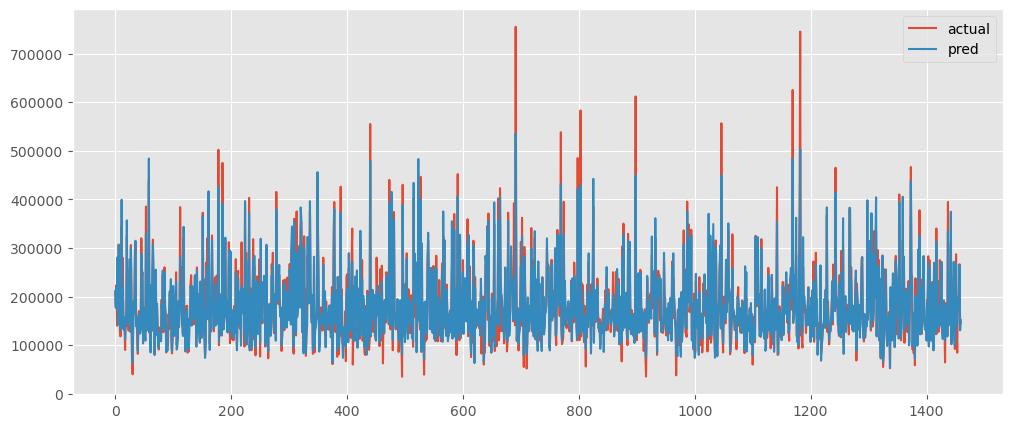

In [19]:
# 예측 값과 실제 값의 차이 시각화
actual_pred_df = pd.DataFrame({
    "actual" : train_y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12, 5))

위 도표를 보면 대부분 값을 정확히 예측 했으나 실제 값 중에서 이상치에 해당하는 부분은 오차가 심한것을 볼 수 있다

따라서 일반적인 경향과 다른 이상치를 학습에서 제외하여 더 좋은 데이터로 학습을 하는 것이 좋아보인다

이때 변수가 많아 한번에 모두 표시 할 수 없으므로 각 모델별로 상위 15개만 분석한다.

그리고 importance_type을 gain으로 하여 어떤 분기로 갔을 때 좋은 점수를 얻었는지 확인을 한다

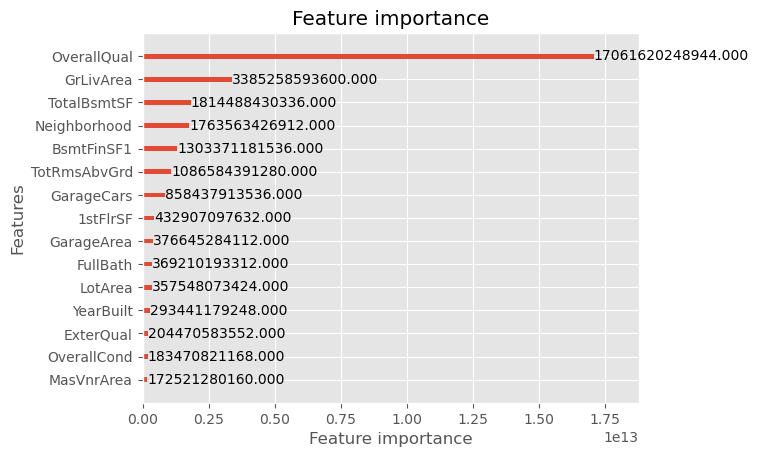

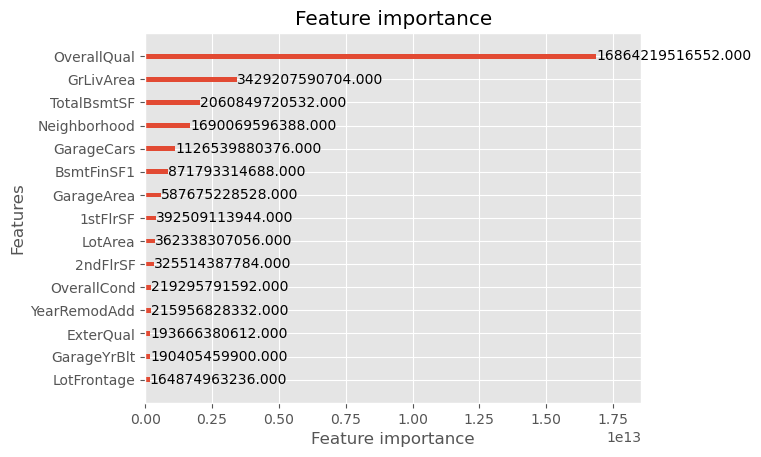

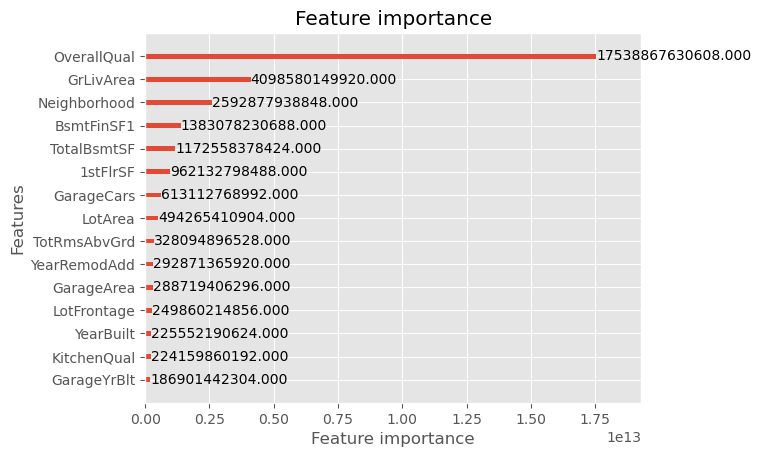

In [20]:
for model in models:
    lgb.plot_importance(model, importance_type = "gain", max_num_features = 15)

이를 통해서 OverallQual가 가장 크게 영향을 미쳤다는 것을 알 수 있다.

OverallQual는 주택 전체의 재료와 마감 등의 퀄리티를 의미하는 변수이다.

그 다음은 GrLivArea가 영향을 미쳤다는 것을 볼 수 있는데 이는 주거하는 영역의 크기를 의미한다

In [21]:
# SalePrice 변수 분석
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

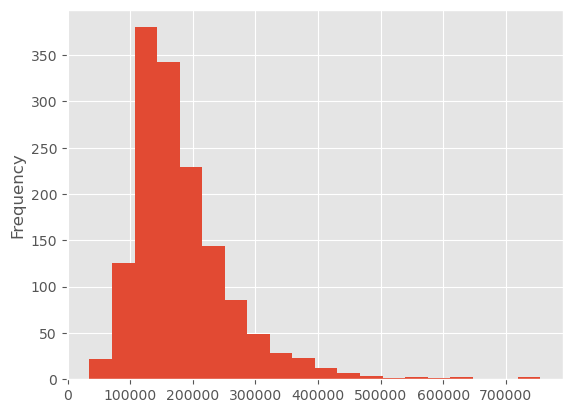

In [22]:
train_df.SalePrice.plot.hist(bins = 20)

가격이 정규분포가 아니고 한쪽으로 치우쳐져있다.

다만 이 대회에서는 평가 지표가 로그의 RMSE임으로 목적변수를 로그화 하는것이 좋은 평가지표를 표현하기 쉽다

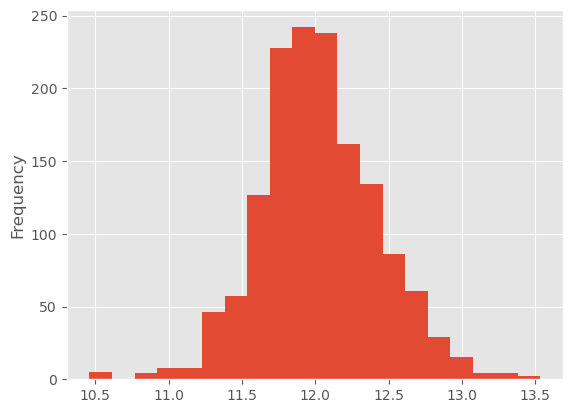

In [23]:
np.log(train_df.SalePrice).plot.hist(bins = 20)

In [98]:
# 목적 변수를 로그화 하여 예측 정확도 향상

train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [99]:
import warnings
warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0435757
[20]	valid_0's l2: 0.0223987
[30]	valid_0's l2: 0.0176962
[40]	valid_0's l2: 0.0164304
[50]	valid_0's l2: 0.0161943
[60]	valid_0's l2: 0.0161858
[70]	valid_0's l2: 0.0161666
[80]	valid_0's l2: 0.0161769
[90]	valid_0's l2: 0.0162121
Early stopping, best iteration is:
[73]	valid_0's l2: 0.0161129
0.010713887493550796
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0480056
[20]	valid_0's l2: 0.0274907
[30]	valid_0's l2: 0.022779
[40]	valid_0's l2: 0.0214744
[50]	valid_0's l2: 0.0209095
[60]	valid_0's l2: 0.0205922
[70]	valid_0's l2: 0.0204381
[80]	valid_0's l2: 0.0203135
[90]	valid_0's l2: 0.020318
[100]	valid_0's l2: 0.0202246
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0202246
0.012122364246993625
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0388654
[20]	valid_0's l2: 0.0209198
[30]	valid_0's l2: 0.0176

In [100]:
sum(rmses) / len(rmses)

0.011215814478375608

In [27]:
# 설명 변수의 전처리 - 결측치 확인
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [28]:
all_df.isnull().sum().sort_values(ascending = False).head(40)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Street             0
RoofMatl           0
MSSubClass         0
LotArea            0
OverallCond        0
dtype: int64

SalePrice의 경우는 test에 값이 없으므로 결측치가 존재 할 수 밖에 없다

다만 PoolQC, MiscFeature, Alley, Fence, FireplaceQu 등은 많은 결측치를 가지고 있다

In [29]:
# 시설이 있으면 1 아니면 0으로 값 변환
HighFacility = ["PoolQC", "MiscFeature", "Alley"]
for facility in HighFacility:
    all_df.loc[~all_df[facility].isnull(), facility] = 1
    all_df.loc[all_df[facility].isnull(), facility] = 0

In [30]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)

In [31]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

In [32]:
all_df = all_df.drop(HighFacility, axis = 1)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,6,2006,WD,Normal,NaN,0
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,4,2006,WD,Abnorml,NaN,0
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2006,WD,Abnorml,NaN,0
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,700,7,2006,WD,Normal,NaN,1


데이터 중에서 크기가 너무 큰 경우나 작은 경우와 같이 일반적인 경향과 다른 데이터가 있을 경우 훈련도중 모델이 이런 노이즈에 민감하게 반응하여 일반화가 잘 되지 않을 수도 있다.

다만 이상치를 과도하게 판정하여 필요한 데이터까지 삭제하게 된다면 평균적인 데이터로밖에 예측할 수 없고 정확도가 떨어지게 된다.

In [33]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [34]:
#수치 데이터만 추출
train_df_num = train_df.select_dtypes(include = [np.number])
train_df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [35]:
# 수치 데이터 중에서 비례 척도가 아닌 것들 제거
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]
num_features = list(set(train_df_num) - set(nonratio_features))
num_features

['BsmtHalfBath',
 'BedroomAbvGr',
 'OpenPorchSF',
 'LotArea',
 'GarageArea',
 'MiscVal',
 'PoolArea',
 'GarageYrBlt',
 'BsmtUnfSF',
 '3SsnPorch',
 'MasVnrArea',
 'GrLivArea',
 'ScreenPorch',
 '1stFlrSF',
 'FullBath',
 'Fireplaces',
 'LowQualFinSF',
 'WoodDeckSF',
 'BsmtFullBath',
 '2ndFlrSF',
 'BsmtFinSF2',
 'HalfBath',
 'EnclosedPorch',
 'BsmtFinSF1',
 'GarageCars',
 'LotFrontage',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'SalePrice',
 'KitchenAbvGr']

In [36]:
train_df_num_rs = train_df_num[num_features]
train_df_num_rs

,BsmtHalfBath,BedroomAbvGr,OpenPorchSF,LotArea,GarageArea,MiscVal,PoolArea,GarageYrBlt,BsmtUnfSF,3SsnPorch,...,BsmtFinSF2,HalfBath,EnclosedPorch,BsmtFinSF1,GarageCars,LotFrontage,TotRmsAbvGrd,TotalBsmtSF,SalePrice,KitchenAbvGr
0,0,3,61,8450,548,0,0,2003.0,150,0,...,0,1,0,706,2,65.0,8,856,208500,1
1,1,3,0,9600,460,0,0,1976.0,284,0,...,0,0,0,978,2,80.0,6,1262,181500,1
2,0,3,42,11250,608,0,0,2001.0,434,0,...,0,1,0,486,2,68.0,6,920,223500,1
3,0,3,35,9550,642,0,0,1998.0,540,0,...,0,0,272,216,3,60.0,7,756,140000,1
4,0,4,84,14260,836,0,0,2000.0,490,0,...,0,1,0,655,3,84.0,9,1145,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,3,40,7917,460,0,0,1999.0,953,0,...,0,1,0,0,2,62.0,7,953,175000,1
1456,0,3,0,13175,500,0,0,1978.0,589,0,...,163,0,0,790,2,85.0,7,1542,210000,1
1457,0,4,60,9042,252,2500,0,1941.0,877,0,...,0,0,0,275,1,66.0,9,1152,266500,1
1458,0,2,0,9717,240,0,0,1950.0,0,0,...,1029,0,112,49,1,68.0,5,1078,142125,1


In [37]:
# 다수의 데이터가 0인 변수 확인
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

BsmtHalfBath 1378
MiscVal 1408
PoolArea 1453
3SsnPorch 1436
ScreenPorch 1344
LowQualFinSF 1434
BsmtFinSF2 1293
EnclosedPorch 1252


In [38]:
# 특정 값만 가지는 변수 확인
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BsmtHalfBath 3
BedroomAbvGr 8
PoolArea 8
FullBath 4
Fireplaces 4
BsmtFullBath 4
HalfBath 3
GarageCars 5
TotRmsAbvGrd 12
KitchenAbvGr 4


In [39]:
# 이상치를 평균을 중심으로 하는 분포에서 표준 편차에 3배 이상 차이나는 것으로 고르기
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) |
                             (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)]
    print(col, len(tmp_df))

BsmtHalfBath 82
BedroomAbvGr 14
OpenPorchSF 27
LotArea 13
GarageArea 7
MiscVal 8
PoolArea 7
GarageYrBlt 1
BsmtUnfSF 11
3SsnPorch 23
MasVnrArea 32
GrLivArea 16
ScreenPorch 55
1stFlrSF 12
FullBath 0
Fireplaces 5
LowQualFinSF 20
WoodDeckSF 22
BsmtFullBath 16
2ndFlrSF 4
BsmtFinSF2 50
HalfBath 12
EnclosedPorch 51
BsmtFinSF1 6
GarageCars 0
LotFrontage 12
TotRmsAbvGrd 12
TotalBsmtSF 10
SalePrice 22
KitchenAbvGr 68


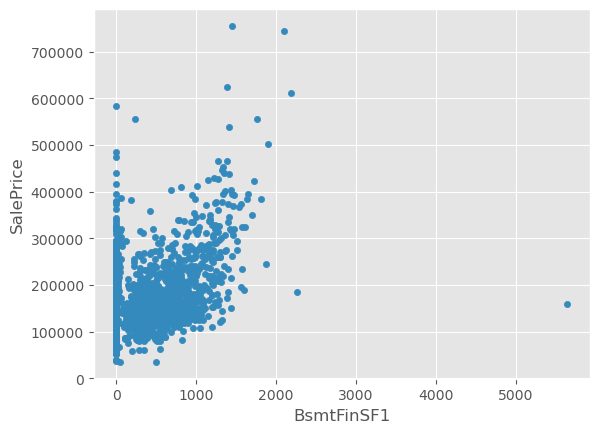

In [40]:
# 분포를 시각화 하기
all_df.plot.scatter(x = "BsmtFinSF1", y = "SalePrice")

In [41]:
all_df[all_df.BsmtFinSF1 > 5000] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


In [42]:
all_df[all_df.TotalBsmtSF > 6000] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


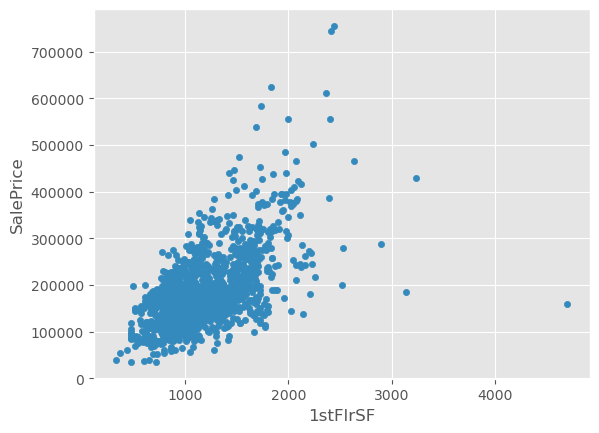

In [43]:
all_df.plot.scatter(x = "1stFlrSF", y = "SalePrice")

In [44]:
all_df[all_df["1stFlrSF"] > 4000] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


위의 값들을 보면 일반적으로 값이 증가할때마다 SalePrice도 같이 증가하는 것을 볼 수 있다.

다만 id가 1299인 집과 같이 이상치인 값들도 있다.

따라서 이러한 노이즈들을 줄이기 위해서 역치를 바련하여 이상치를 제외해야한다

단, 테스트 데이터의 경우는 이상치라고 제거해서는 안된다

In [45]:
all_df = all_df[(all_df["BsmtFinSF1"] < 2000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["TotalBsmtSF"] < 3000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["GrLivArea"] < 4500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["1stFlrSF"] < 2500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["LotArea"] < 10000) | (all_df["SalePrice"].isnull())]

In [46]:
# 사전 처리를 한 후 RMSE다시 계산하기
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [47]:
for cat in categories:
    le = LabelEncoder()
    
    all_df[cat].fillna("missing", inplace = True) # 비어있는것 missing으로 채우기
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,4,0,2,2008,8,4,208500.0,0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,4,0,5,2007,8,4,181500.0,0
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,4,0,2,2006,8,0,140000.0,0
8,9,50,4,51.0,6120,1,3,3,0,4,...,0,0,4,0,4,2008,8,0,129900.0,0
9,10,190,3,50.0,7420,1,3,3,0,0,...,0,0,4,0,1,2008,8,4,118000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,4,0,6,2006,8,4,NaN,0
2915,2916,160,4,21.0,1894,1,3,3,0,4,...,0,0,4,0,4,2006,8,0,NaN,0
2916,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,4,0,9,2006,8,0,NaN,0
2917,2918,85,3,62.0,10441,1,3,3,0,4,...,0,0,2,700,7,2006,8,4,NaN,1


In [48]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [49]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0344373
[20]	valid_0's l2: 0.0209327
[30]	valid_0's l2: 0.0185668
[40]	valid_0's l2: 0.0181254
[50]	valid_0's l2: 0.0179275
[60]	valid_0's l2: 0.0180996
Early stopping, best iteration is:
[47]	valid_0's l2: 0.0178809
0.011508385016203701
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0463983
[20]	valid_0's l2: 0.0289239
[30]	valid_0's l2: 0.0234756
[40]	valid_0's l2: 0.0215028
[50]	valid_0's l2: 0.0209317
[60]	valid_0's l2: 0.020679
[70]	valid_0's l2: 0.0204815
[80]	valid_0's l2: 0.0204638
[90]	valid_0's l2: 0.0203568
[100]	valid_0's l2: 0.0204438
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.0203519
0.012465821817450458
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0288362
[20]	valid_0's l2: 0.0162215
[30]	valid_0's l2: 0.0144605
[40]	valid_0's l2: 0.0141991
[50]	valid_0's l2: 0.0142403
[60]	valid_0's l2: 0.0143

In [50]:
sum(rmses) / len(rmses)

0.011332258225122615

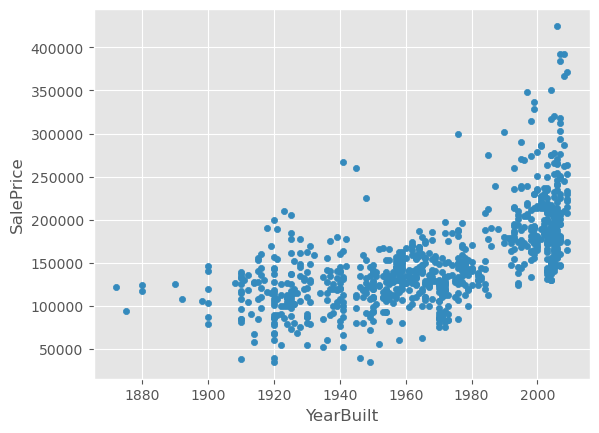

In [51]:
all_df.plot.scatter(x = "YearBuilt", y = "SalePrice")

In [52]:
# 시간과 관련된 변수의 통계량 확인
all_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2295.000000,2295.000000,2150.000000,2295.000000
mean,1970.213072,1983.442702,1977.384186,2007.800871
std,30.605719,21.271568,26.175435,1.309545
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1951.000000,1963.000000,1959.000000,2007.000000
50%,1972.000000,1992.000000,1979.000000,2008.000000
75%,2000.000000,2003.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [101]:
# 시간 변수로 새로운 특징 값 작성하기
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]

In [102]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [103]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.043424
[20]	valid_0's l2: 0.0219431
[30]	valid_0's l2: 0.0175084
[40]	valid_0's l2: 0.0164011
[50]	valid_0's l2: 0.0159506
[60]	valid_0's l2: 0.0158777
[70]	valid_0's l2: 0.0158725
[80]	valid_0's l2: 0.0158161
[90]	valid_0's l2: 0.0157013
[100]	valid_0's l2: 0.0157635
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 0.0157013
0.010594657996279715
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0485037
[20]	valid_0's l2: 0.0280057
[30]	valid_0's l2: 0.0234011
[40]	valid_0's l2: 0.0218136
[50]	valid_0's l2: 0.0211993
[60]	valid_0's l2: 0.0211445
[70]	valid_0's l2: 0.0210807
[80]	valid_0's l2: 0.0211275
[90]	valid_0's l2: 0.0211583
Early stopping, best iteration is:
[76]	valid_0's l2: 0.0210805
0.01239211658532726
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0389367
[20]	valid_0's l2: 0.0207644
[30]	valid_0's l2: 0.01763

In [104]:
sum(rmses) / len(rmses)

0.011241179104574133

In [105]:
# 하이퍼파라미터 최적화
# 하이퍼파라미터 튜닝용 패키지인 Optuna 사용
import optuna

#### optuna 사용 방법
1. 모델의 학습 흐름과 개선하려는 정확도 설정
2. 조정하고자 하는 모델의 하이퍼파라미터 및 탐색 범위 설정
3. 실행 횟수를 정하여 최적화 실행

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2, random_state = 1234, shuffle = False, stratify = None)


In [107]:
def objective(trial):
    params = {
        "objective" : "regression",
        "random_seed" : 1234,
        "learning_rate" : 0.05,
        "n_estimators" : 1000,
        "num_leaves" : trial.suggest_int("num_leaves", 4, 64),
        "max_bin" : trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction" : trial.suggest_uniform("bagging_fraction", 0.4, 0.9),
        "bagging_freq" : trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction" : trial.suggest_uniform("feature_fraction", 0.4, 0.9),
        "min_data_in_leaf" : trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf" : trial.suggest_int("min_sum_hessian_in_leaf", 1, 10)
    }
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(params,                        
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [108]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective, n_trials=50)
study.best_params

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0713128
[20]	valid_0's l2: 0.0403315
[30]	valid_0's l2: 0.0278401
[40]	valid_0's l2: 0.0225051
[50]	valid_0's l2: 0.0200022
[60]	valid_0's l2: 0.0186813
[70]	valid_0's l2: 0.0181779
[80]	valid_0's l2: 0.018001
[90]	valid_0's l2: 0.0176997
[100]	valid_0's l2: 0.0175704
[110]	valid_0's l2: 0.0173823
[120]	valid_0's l2: 0.0174
[130]	valid_0's l2: 0.017247
[140]	valid_0's l2: 0.017053
[150]	valid_0's l2: 0.0168631
[160]	valid_0's l2: 0.0168549


[I 2023-09-11 16:39:45,854] Trial 0 finished with value: 0.1293869344980831 and parameters: {'num_leaves': 48, 'max_bin': 97, 'bagging_fraction': 0.7575946831862097, 'bagging_freq': 4, 'feature_fraction': 0.8289728088113784, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.1293869344980831.


[170]	valid_0's l2: 0.0168068
[180]	valid_0's l2: 0.01675
[190]	valid_0's l2: 0.0167899
Early stopping, best iteration is:
[173]	valid_0's l2: 0.016741
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0746703


[I 2023-09-11 16:39:46,122] Trial 1 finished with value: 0.13140657217132387 and parameters: {'num_leaves': 23, 'max_bin': 71, 'bagging_fraction': 0.5921908536463499, 'bagging_freq': 8, 'feature_fraction': 0.8458865003910399, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 0 with value: 0.1293869344980831.


[20]	valid_0's l2: 0.0434597
[30]	valid_0's l2: 0.0299483
[40]	valid_0's l2: 0.0244108
[50]	valid_0's l2: 0.0220096
[60]	valid_0's l2: 0.0202296
[70]	valid_0's l2: 0.0191848
[80]	valid_0's l2: 0.0184762
[90]	valid_0's l2: 0.0181923
[100]	valid_0's l2: 0.0178862
[110]	valid_0's l2: 0.0176892
[120]	valid_0's l2: 0.0174396
[130]	valid_0's l2: 0.0174953
[140]	valid_0's l2: 0.0173823
[150]	valid_0's l2: 0.017357
[160]	valid_0's l2: 0.017695
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0172677
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0725174
[20]	valid_0's l2: 0.0409883
[30]	valid_0's l2: 0.0287279
[40]	valid_0's l2: 0.0229796
[50]	valid_0's l2: 0.0202708
[60]	valid_0's l2: 0.019054
[70]	valid_0's l2: 0.0182365
[80]	valid_0's l2: 0.017869
[90]	valid_0's l2: 0.0175902
[100]	valid_0's l2: 0.0172249
[110]	valid_0's l2: 0.0168853
[120]	valid_0's l2: 0.0167665
[130]	valid_0's l2: 0.0167364
[140]	valid_0's l2: 0.0165908
[150]	valid_0's l2: 0.016

[I 2023-09-11 16:39:46,504] Trial 2 finished with value: 0.1272160555854661 and parameters: {'num_leaves': 42, 'max_bin': 89, 'bagging_fraction': 0.6644474598764523, 'bagging_freq': 9, 'feature_fraction': 0.5963923980504149, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 2 with value: 0.1272160555854661.
[I 2023-09-11 16:39:46,813] Trial 3 finished with value: 0.13271028947840255 and parameters: {'num_leaves': 13, 'max_bin': 198, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 4, 'feature_fraction': 0.8785775794765232, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 2 with value: 0.1272160555854661.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0771622
[20]	valid_0's l2: 0.0457977
[30]	valid_0's l2: 0.0333239
[40]	valid_0's l2: 0.0267572
[50]	valid_0's l2: 0.0227079
[60]	valid_0's l2: 0.0207235
[70]	valid_0's l2: 0.0199442
[80]	valid_0's l2: 0.0190496
[90]	valid_0's l2: 0.0187521
[100]	valid_0's l2: 0.0186902
[110]	valid_0's l2: 0.0186185
[120]	valid_0's l2: 0.0184499
[130]	valid_0's l2: 0.0182912
[140]	valid_0's l2: 0.0182128
[150]	valid_0's l2: 0.0178921
[160]	valid_0's l2: 0.0178474
[170]	valid_0's l2: 0.0176828
[180]	valid_0's l2: 0.0177008
[190]	valid_0's l2: 0.0176595
[200]	valid_0's l2: 0.0179232
Early stopping, best iteration is:
[183]	valid_0's l2: 0.017612
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0718527
[20]	valid_0's l2: 0.0403132
[30]	valid_0's l2: 0.0271279
[40]	valid_0's l2: 0.0219015
[50]	valid_0's l2: 0.0194784
[60]	valid_0's l2: 0.0182312
[70]	valid_0's l2: 0.0176422
[80]	valid_0's l2: 0

[I 2023-09-11 16:39:47,227] Trial 4 finished with value: 0.1268704588228347 and parameters: {'num_leaves': 39, 'max_bin': 79, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 8, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 4 with value: 0.1268704588228347.


[220]	valid_0's l2: 0.016157
Early stopping, best iteration is:
[201]	valid_0's l2: 0.0160961
Training until validation scores don't improve for 20 rounds


[I 2023-09-11 16:39:47,492] Trial 5 finished with value: 0.13371370030982063 and parameters: {'num_leaves': 36, 'max_bin': 81, 'bagging_fraction': 0.4529538035938961, 'bagging_freq': 8, 'feature_fraction': 0.5322778060523135, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 3}. Best is trial 4 with value: 0.1268704588228347.


[10]	valid_0's l2: 0.0748914
[20]	valid_0's l2: 0.0424992
[30]	valid_0's l2: 0.0299106
[40]	valid_0's l2: 0.0244412
[50]	valid_0's l2: 0.0218917
[60]	valid_0's l2: 0.0202188
[70]	valid_0's l2: 0.0191618
[80]	valid_0's l2: 0.0186576
[90]	valid_0's l2: 0.0187568
[100]	valid_0's l2: 0.0182708
[110]	valid_0's l2: 0.0180741
[120]	valid_0's l2: 0.0178793
[130]	valid_0's l2: 0.0179744
[140]	valid_0's l2: 0.0179504
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0178793
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0710092
[20]	valid_0's l2: 0.039522
[30]	valid_0's l2: 0.0272805
[40]	valid_0's l2: 0.0219643
[50]	valid_0's l2: 0.0196664
[60]	valid_0's l2: 0.0185963
[70]	valid_0's l2: 0.0177742
[80]	valid_0's l2: 0.017392
[90]	valid_0's l2: 0.0172279
[100]	valid_0's l2: 0.0168938
[110]	valid_0's l2: 0.0166457
[120]	valid_0's l2: 0.0166604
[130]	valid_0's l2: 0.0166289
Early stopping, best iteration is:
[111]	valid_0's l2: 0.0166068


[I 2023-09-11 16:39:47,839] Trial 6 finished with value: 0.12886727423686598 and parameters: {'num_leaves': 59, 'max_bin': 78, 'bagging_fraction': 0.6842169744343243, 'bagging_freq': 1, 'feature_fraction': 0.5620705038966071, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.1268704588228347.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0717922
[20]	valid_0's l2: 0.0394588
[30]	valid_0's l2: 0.0272569
[40]	valid_0's l2: 0.0224513
[50]	valid_0's l2: 0.0199619
[60]	valid_0's l2: 0.0187451
[70]	valid_0's l2: 0.0181186
[80]	valid_0's l2: 0.0178008
[90]	valid_0's l2: 0.0175299
[100]	valid_0's l2: 0.0173547
[110]	valid_0's l2: 0.0171103
[120]	valid_0's l2: 0.017016
[130]	valid_0's l2: 0.0168458
[140]	valid_0's l2: 0.0167587
[150]	valid_0's l2: 0.0167647
[160]	valid_0's l2: 0.0167874
[170]	valid_0's l2: 0.0167777
[180]	valid_0's l2: 0.0167342
[190]	valid_0's l2: 0.0167215
[200]	valid_0's l2: 0.0167089
[210]	valid_0's l2: 0.0167034
[220]	valid_0's l2: 0.0166707
[230]	valid_0's l2: 0.0166213


[I 2023-09-11 16:39:48,311] Trial 7 finished with value: 0.12856808991994273 and parameters: {'num_leaves': 44, 'max_bin': 67, 'bagging_fraction': 0.8718740392573121, 'bagging_freq': 10, 'feature_fraction': 0.6249749949556138, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 4 with value: 0.1268704588228347.


[240]	valid_0's l2: 0.0165609
[250]	valid_0's l2: 0.0165391
[260]	valid_0's l2: 0.0165869
Early stopping, best iteration is:
[248]	valid_0's l2: 0.0165297


[I 2023-09-11 16:39:48,559] Trial 8 finished with value: 0.13349978301209386 and parameters: {'num_leaves': 5, 'max_bin': 107, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 8, 'feature_fraction': 0.4854547925680226, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.1268704588228347.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0871979
[20]	valid_0's l2: 0.0559899
[30]	valid_0's l2: 0.0412224
[40]	valid_0's l2: 0.0325782
[50]	valid_0's l2: 0.0277187
[60]	valid_0's l2: 0.0247336
[70]	valid_0's l2: 0.0228443
[80]	valid_0's l2: 0.0219204
[90]	valid_0's l2: 0.0211361
[100]	valid_0's l2: 0.0207016
[110]	valid_0's l2: 0.0202101
[120]	valid_0's l2: 0.0198556
[130]	valid_0's l2: 0.0192535
[140]	valid_0's l2: 0.0190369
[150]	valid_0's l2: 0.0186807
[160]	valid_0's l2: 0.0185003
[170]	valid_0's l2: 0.0182207
[180]	valid_0's l2: 0.0181841
[190]	valid_0's l2: 0.0181228
[200]	valid_0's l2: 0.0180059
[210]	valid_0's l2: 0.0178406
[220]	valid_0's l2: 0.0179295
Early stopping, best iteration is:
[209]	valid_0's l2: 0.0178222


[I 2023-09-11 16:39:48,824] Trial 9 finished with value: 0.12610590888100673 and parameters: {'num_leaves': 18, 'max_bin': 149, 'bagging_fraction': 0.5818553854713113, 'bagging_freq': 10, 'feature_fraction': 0.4192127132363674, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 9 with value: 0.12610590888100673.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.076307
[20]	valid_0's l2: 0.0450757
[30]	valid_0's l2: 0.0309243
[40]	valid_0's l2: 0.0243346
[50]	valid_0's l2: 0.0214581
[60]	valid_0's l2: 0.0194441
[70]	valid_0's l2: 0.0182653
[80]	valid_0's l2: 0.0176097
[90]	valid_0's l2: 0.0173033
[100]	valid_0's l2: 0.0171164
[110]	valid_0's l2: 0.0167074
[120]	valid_0's l2: 0.0164212
[130]	valid_0's l2: 0.0163151
[140]	valid_0's l2: 0.016024
[150]	valid_0's l2: 0.0159174
[160]	valid_0's l2: 0.0160567
Early stopping, best iteration is:
[149]	valid_0's l2: 0.0159027


[I 2023-09-11 16:39:49,117] Trial 10 finished with value: 0.12917734282925086 and parameters: {'num_leaves': 10, 'max_bin': 97, 'bagging_fraction': 0.5044383780474173, 'bagging_freq': 4, 'feature_fraction': 0.8976497838389439, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 9}. Best is trial 9 with value: 0.12610590888100673.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0789349
[20]	valid_0's l2: 0.048182
[30]	valid_0's l2: 0.0340586
[40]	valid_0's l2: 0.0269015
[50]	valid_0's l2: 0.0233334
[60]	valid_0's l2: 0.0209836
[70]	valid_0's l2: 0.0192941
[80]	valid_0's l2: 0.0190143
[90]	valid_0's l2: 0.0187055
[100]	valid_0's l2: 0.0182396
[110]	valid_0's l2: 0.0178156
[120]	valid_0's l2: 0.0177865
[130]	valid_0's l2: 0.0175538
[140]	valid_0's l2: 0.0173161
[150]	valid_0's l2: 0.0168496
[160]	valid_0's l2: 0.016762
[170]	valid_0's l2: 0.0167425
[180]	valid_0's l2: 0.0167238
[190]	valid_0's l2: 0.0167216
Early stopping, best iteration is:
[173]	valid_0's l2: 0.0166868
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0749062
[20]	valid_0's l2: 0.0439851
[30]	valid_0's l2: 0.0309332
[40]	valid_0's l2: 0.0245962
[50]	valid_0's l2: 0.0215858
[60]	valid_0's l2: 0.0196321
[70]	valid_0's l2: 0.0183836
[80]	valid_0's l2: 0.0178931
[90]	valid_0's l2: 0.0

[I 2023-09-11 16:39:49,521] Trial 11 finished with value: 0.12380994063984649 and parameters: {'num_leaves': 18, 'max_bin': 193, 'bagging_fraction': 0.6373487511442064, 'bagging_freq': 8, 'feature_fraction': 0.5690038074194459, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.12380994063984649.


[290]	valid_0's l2: 0.0153433
[300]	valid_0's l2: 0.0153977
Early stopping, best iteration is:
[289]	valid_0's l2: 0.0153289
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0716378
[20]	valid_0's l2: 0.0396348
[30]	valid_0's l2: 0.0274129
[40]	valid_0's l2: 0.0220172
[50]	valid_0's l2: 0.0198571
[60]	valid_0's l2: 0.0188331
[70]	valid_0's l2: 0.0182263
[80]	valid_0's l2: 0.0181004
[90]	valid_0's l2: 0.0177714
[100]	valid_0's l2: 0.0175994
[110]	valid_0's l2: 0.0174451
[120]	valid_0's l2: 0.0174126
[130]	valid_0's l2: 0.0172662
[140]	valid_0's l2: 0.0171417
[150]	valid_0's l2: 0.0171812
[160]	valid_0's l2: 0.0171225
[170]	valid_0's l2: 0.0170683
[180]	valid_0's l2: 0.0169903


[I 2023-09-11 16:39:50,020] Trial 12 finished with value: 0.1301034036902563 and parameters: {'num_leaves': 52, 'max_bin': 99, 'bagging_fraction': 0.7891727410129545, 'bagging_freq': 4, 'feature_fraction': 0.5843625853304821, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.12380994063984649.


[190]	valid_0's l2: 0.0170104
[200]	valid_0's l2: 0.0169541
[210]	valid_0's l2: 0.016934
[220]	valid_0's l2: 0.0169717
Early stopping, best iteration is:
[205]	valid_0's l2: 0.0169269
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0751533
[20]	valid_0's l2: 0.0428968
[30]	valid_0's l2: 0.0306625
[40]	valid_0's l2: 0.0248209
[50]	valid_0's l2: 0.0213994
[60]	valid_0's l2: 0.0201006
[70]	valid_0's l2: 0.0190988
[80]	valid_0's l2: 0.0185547
[90]	valid_0's l2: 0.0183848
[100]	valid_0's l2: 0.0180573
[110]	valid_0's l2: 0.0178692
[120]	valid_0's l2: 0.0179318
[130]	valid_0's l2: 0.0177967
[140]	valid_0's l2: 0.0175984
[150]	valid_0's l2: 0.0174036
[160]	valid_0's l2: 0.0173681
[170]	valid_0's l2: 0.0172702
[180]	valid_0's l2: 0.0172112
[190]	valid_0's l2: 0.017282
[200]	valid_0's l2: 0.0172912
[210]	valid_0's l2: 0.0172047
[220]	valid_0's l2: 0.0172324
[230]	valid_0's l2: 0.01725
Early stopping, best iteration is:
[214]	valid_0's l2: 0.0171403


[I 2023-09-11 16:39:50,355] Trial 13 finished with value: 0.1309210660962977 and parameters: {'num_leaves': 53, 'max_bin': 86, 'bagging_fraction': 0.44804920394698156, 'bagging_freq': 4, 'feature_fraction': 0.6343256008238508, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.12380994063984649.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.071584
[20]	valid_0's l2: 0.0401834
[30]	valid_0's l2: 0.0269028
[40]	valid_0's l2: 0.0212364
[50]	valid_0's l2: 0.0187596
[60]	valid_0's l2: 0.0175053
[70]	valid_0's l2: 0.0166954
[80]	valid_0's l2: 0.0163327
[90]	valid_0's l2: 0.0159987
[100]	valid_0's l2: 0.0157467
[110]	valid_0's l2: 0.0154959
[120]	valid_0's l2: 0.0154182
[130]	valid_0's l2: 0.0152881
[140]	valid_0's l2: 0.0151569
[150]	valid_0's l2: 0.0150936
[160]	valid_0's l2: 0.0150278
[170]	valid_0's l2: 0.0149276
[180]	valid_0's l2: 0.0148499


[I 2023-09-11 16:39:50,879] Trial 14 finished with value: 0.12119317401235326 and parameters: {'num_leaves': 43, 'max_bin': 199, 'bagging_fraction': 0.7696317896991509, 'bagging_freq': 1, 'feature_fraction': 0.6208554606244228, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.12119317401235326.


[190]	valid_0's l2: 0.0148622
[200]	valid_0's l2: 0.0147896
[210]	valid_0's l2: 0.0147858
[220]	valid_0's l2: 0.014802
[230]	valid_0's l2: 0.0147413
[240]	valid_0's l2: 0.014716
[250]	valid_0's l2: 0.0147064
[260]	valid_0's l2: 0.0147152
Early stopping, best iteration is:
[245]	valid_0's l2: 0.0146878
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0703922
[20]	valid_0's l2: 0.0392492
[30]	valid_0's l2: 0.0276774
[40]	valid_0's l2: 0.0226165
[50]	valid_0's l2: 0.0204911
[60]	valid_0's l2: 0.0194707
[70]	valid_0's l2: 0.0190292
[80]	valid_0's l2: 0.0188051
[90]	valid_0's l2: 0.0184351
[100]	valid_0's l2: 0.0182932
[110]	valid_0's l2: 0.0182
[120]	valid_0's l2: 0.0181542
[130]	valid_0's l2: 0.0181084
[140]	valid_0's l2: 0.0180695
[150]	valid_0's l2: 0.0180333
[160]	valid_0's l2: 0.0180764
[170]	valid_0's l2: 0.0180642
Early stopping, best iteration is:
[151]	valid_0's l2: 0.0180233


[I 2023-09-11 16:39:51,477] Trial 15 finished with value: 0.1342509738920647 and parameters: {'num_leaves': 63, 'max_bin': 180, 'bagging_fraction': 0.7443305914028853, 'bagging_freq': 4, 'feature_fraction': 0.8591177331810724, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 3}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.073259
[20]	valid_0's l2: 0.0421883
[30]	valid_0's l2: 0.0295551
[40]	valid_0's l2: 0.0236796
[50]	valid_0's l2: 0.0207183
[60]	valid_0's l2: 0.0192575
[70]	valid_0's l2: 0.0189464
[80]	valid_0's l2: 0.0188337
[90]	valid_0's l2: 0.0185673
[100]	valid_0's l2: 0.0188129
[110]	valid_0's l2: 0.0187556
Early stopping, best iteration is:
[90]	valid_0's l2: 0.0185673


[I 2023-09-11 16:39:51,835] Trial 16 finished with value: 0.13626205451591228 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.5326947454697227, 'bagging_freq': 10, 'feature_fraction': 0.8605788051185999, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 7}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0703531
[20]	valid_0's l2: 0.0402921
[30]	valid_0's l2: 0.0281504
[40]	valid_0's l2: 0.022951
[50]	valid_0's l2: 0.0203794
[60]	valid_0's l2: 0.0189462
[70]	valid_0's l2: 0.0185325
[80]	valid_0's l2: 0.0181213
[90]	valid_0's l2: 0.0176774
[100]	valid_0's l2: 0.017454
[110]	valid_0's l2: 0.017302
[120]	valid_0's l2: 0.0173637
[130]	valid_0's l2: 0.0171583
[140]	valid_0's l2: 0.0170476
[150]	valid_0's l2: 0.0169527
[160]	valid_0's l2: 0.0169487
[170]	valid_0's l2: 0.0168994
[180]	valid_0's l2: 0.0167676
[190]	valid_0's l2: 0.016763
[200]	valid_0's l2: 0.0167639
[210]	valid_0's l2: 0.0167334
[220]	valid_0's l2: 0.0166894
[230]	valid_0's l2: 0.0166536
[240]	valid_0's l2: 0.0166129
[250]	valid_0's l2: 0.0165695
[260]	valid_0's l2: 0.0165783
[270]	valid_0's l2: 0.0165306
[280]	valid_0's l2: 0.0165237
[290]	valid_0's l2: 0.0164902
[300]	valid_0's l2: 0.0164839
[310]	valid_0's l2: 0.0164594
[320]	valid_0's l2: 0.

[I 2023-09-11 16:39:52,922] Trial 17 finished with value: 0.12707768258647445 and parameters: {'num_leaves': 47, 'max_bin': 154, 'bagging_fraction': 0.7337051899818409, 'bagging_freq': 4, 'feature_fraction': 0.7235870700937778, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 1}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0746332
[20]	valid_0's l2: 0.043001
[30]	valid_0's l2: 0.0301778
[40]	valid_0's l2: 0.0242914
[50]	valid_0's l2: 0.0218288
[60]	valid_0's l2: 0.0204317
[70]	valid_0's l2: 0.0193637
[80]	valid_0's l2: 0.018921
[90]	valid_0's l2: 0.0187612
[100]	valid_0's l2: 0.0184044
[110]	valid_0's l2: 0.0179641
[120]	valid_0's l2: 0.0177743
[130]	valid_0's l2: 0.0175752
[140]	valid_0's l2: 0.0174478
[150]	valid_0's l2: 0.0173492
[160]	valid_0's l2: 0.0174191
[170]	valid_0's l2: 0.0172419
[180]	valid_0's l2: 0.0171057
[190]	valid_0's l2: 0.0170922
[200]	valid_0's l2: 0.0170351
[210]	valid_0's l2: 0.016997
[220]	valid_0's l2: 0.0170102
[230]	valid_0's l2: 0.0170437
Early stopping, best iteration is:
[216]	valid_0's l2: 0.0169856


[I 2023-09-11 16:39:53,331] Trial 18 finished with value: 0.13032891167649877 and parameters: {'num_leaves': 42, 'max_bin': 69, 'bagging_fraction': 0.5989103763793145, 'bagging_freq': 4, 'feature_fraction': 0.4100537730937468, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 14 with value: 0.12119317401235326.
[I 2023-09-11 16:39:53,570] Trial 19 finished with value: 0.1312023508805831 and parameters: {'num_leaves': 6, 'max_bin': 53, 'bagging_fraction': 0.7518686396449581, 'bagging_freq': 1, 'feature_fraction': 0.5243765717599791, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 9}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0834504
[20]	valid_0's l2: 0.0528885
[30]	valid_0's l2: 0.0380144
[40]	valid_0's l2: 0.0296818
[50]	valid_0's l2: 0.0251577
[60]	valid_0's l2: 0.0225988
[70]	valid_0's l2: 0.0209527
[80]	valid_0's l2: 0.0201422
[90]	valid_0's l2: 0.0191104
[100]	valid_0's l2: 0.0185134
[110]	valid_0's l2: 0.018107
[120]	valid_0's l2: 0.0179993
[130]	valid_0's l2: 0.0176885
[140]	valid_0's l2: 0.0176328
[150]	valid_0's l2: 0.0173932
[160]	valid_0's l2: 0.0173507
[170]	valid_0's l2: 0.0172976
[180]	valid_0's l2: 0.0172428
[190]	valid_0's l2: 0.0173092
Early stopping, best iteration is:
[177]	valid_0's l2: 0.0172141
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0729118
[20]	valid_0's l2: 0.0420783
[30]	valid_0's l2: 0.0288432
[40]	valid_0's l2: 0.0230412
[50]	valid_0's l2: 0.0205138
[60]	valid_0's l2: 0.0192415
[70]	valid_0's l2: 0.0185819
[80]	valid_0's l2: 0.0181819
[90]	valid_0's l2: 0.

[I 2023-09-11 16:39:54,031] Trial 20 finished with value: 0.12862097196927352 and parameters: {'num_leaves': 30, 'max_bin': 117, 'bagging_fraction': 0.8763745057584925, 'bagging_freq': 1, 'feature_fraction': 0.8232043362355639, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 7}. Best is trial 14 with value: 0.12119317401235326.


[210]	valid_0's l2: 0.0167205
[220]	valid_0's l2: 0.0167075
[230]	valid_0's l2: 0.0166409
[240]	valid_0's l2: 0.0165605
[250]	valid_0's l2: 0.0165621
[260]	valid_0's l2: 0.016566
Early stopping, best iteration is:
[242]	valid_0's l2: 0.0165433


[I 2023-09-11 16:39:54,341] Trial 21 finished with value: 0.12762871928452516 and parameters: {'num_leaves': 17, 'max_bin': 171, 'bagging_fraction': 0.5982528704234924, 'bagging_freq': 9, 'feature_fraction': 0.5248981378274891, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 6}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0744583
[20]	valid_0's l2: 0.0427798
[30]	valid_0's l2: 0.0291307
[40]	valid_0's l2: 0.0233629
[50]	valid_0's l2: 0.0202461
[60]	valid_0's l2: 0.0190317
[70]	valid_0's l2: 0.0182105
[80]	valid_0's l2: 0.0178195
[90]	valid_0's l2: 0.0174965
[100]	valid_0's l2: 0.0172348
[110]	valid_0's l2: 0.0169366
[120]	valid_0's l2: 0.0167712
[130]	valid_0's l2: 0.0167881
[140]	valid_0's l2: 0.0167209
[150]	valid_0's l2: 0.0165799
[160]	valid_0's l2: 0.0165983
[170]	valid_0's l2: 0.0166245
[180]	valid_0's l2: 0.016618
[190]	valid_0's l2: 0.0164686
[200]	valid_0's l2: 0.0164231
[210]	valid_0's l2: 0.0162891
[220]	valid_0's l2: 0.0163573
[230]	valid_0's l2: 0.0163756
Early stopping, best iteration is:
[210]	valid_0's l2: 0.0162891


[I 2023-09-11 16:39:54,649] Trial 22 finished with value: 0.13035598473454307 and parameters: {'num_leaves': 50, 'max_bin': 75, 'bagging_fraction': 0.6942325425343747, 'bagging_freq': 10, 'feature_fraction': 0.6506621909633512, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0720805
[20]	valid_0's l2: 0.0398182
[30]	valid_0's l2: 0.0273959
[40]	valid_0's l2: 0.0221402
[50]	valid_0's l2: 0.0194601
[60]	valid_0's l2: 0.0182239
[70]	valid_0's l2: 0.0179187
[80]	valid_0's l2: 0.0176483
[90]	valid_0's l2: 0.0173808
[100]	valid_0's l2: 0.0171672
[110]	valid_0's l2: 0.0171622
[120]	valid_0's l2: 0.0169927
[130]	valid_0's l2: 0.0171082
[140]	valid_0's l2: 0.0170493
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0169927


[I 2023-09-11 16:39:54,946] Trial 23 finished with value: 0.1296855845436338 and parameters: {'num_leaves': 37, 'max_bin': 154, 'bagging_fraction': 0.6119275242790898, 'bagging_freq': 10, 'feature_fraction': 0.6350660946278825, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.073577
[20]	valid_0's l2: 0.0427373
[30]	valid_0's l2: 0.0292063
[40]	valid_0's l2: 0.0231851
[50]	valid_0's l2: 0.0203149
[60]	valid_0's l2: 0.0189827
[70]	valid_0's l2: 0.0180438
[80]	valid_0's l2: 0.0175684
[90]	valid_0's l2: 0.0174166
[100]	valid_0's l2: 0.0170756
[110]	valid_0's l2: 0.0170266
[120]	valid_0's l2: 0.016822
[130]	valid_0's l2: 0.0168719
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0168183
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0734138
[20]	valid_0's l2: 0.0416679
[30]	valid_0's l2: 0.0295156
[40]	valid_0's l2: 0.0237467
[50]	valid_0's l2: 0.0212737
[60]	valid_0's l2: 0.0200531
[70]	valid_0's l2: 0.0192829
[80]	valid_0's l2: 0.0188624
[90]	valid_0's l2: 0.0187395
[100]	valid_0's l2: 0.0184112
[110]	valid_0's l2: 0.0180557
[120]	valid_0's l2: 0.0180294
[130]	valid_0's l2: 0.0180872
Early stopping, best iteration is:
[113]	valid_0's l2

[I 2023-09-11 16:39:55,279] Trial 24 finished with value: 0.13421118119876718 and parameters: {'num_leaves': 60, 'max_bin': 129, 'bagging_fraction': 0.7745849185763624, 'bagging_freq': 9, 'feature_fraction': 0.46773703211122514, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.071818
[20]	valid_0's l2: 0.0408148
[30]	valid_0's l2: 0.0281947
[40]	valid_0's l2: 0.0231563
[50]	valid_0's l2: 0.0204729
[60]	valid_0's l2: 0.0190405
[70]	valid_0's l2: 0.0182423
[80]	valid_0's l2: 0.0179139
[90]	valid_0's l2: 0.0176847
[100]	valid_0's l2: 0.0175774
[110]	valid_0's l2: 0.0173946
[120]	valid_0's l2: 0.0174706
[130]	valid_0's l2: 0.0175082
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0173414


[I 2023-09-11 16:39:55,611] Trial 25 finished with value: 0.13168678696552982 and parameters: {'num_leaves': 51, 'max_bin': 143, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 7, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 14 with value: 0.12119317401235326.
[I 2023-09-11 16:39:55,846] Trial 26 finished with value: 0.13254266144916038 and parameters: {'num_leaves': 7, 'max_bin': 53, 'bagging_fraction': 0.5837809350239482, 'bagging_freq': 7, 'feature_fraction': 0.8920211206820732, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 6}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.08164
[20]	valid_0's l2: 0.0504073
[30]	valid_0's l2: 0.0356581
[40]	valid_0's l2: 0.0280282
[50]	valid_0's l2: 0.0236854
[60]	valid_0's l2: 0.0213409
[70]	valid_0's l2: 0.0198822
[80]	valid_0's l2: 0.0193525
[90]	valid_0's l2: 0.0187382
[100]	valid_0's l2: 0.0183327
[110]	valid_0's l2: 0.0180717
[120]	valid_0's l2: 0.0176839
[130]	valid_0's l2: 0.0175676
[140]	valid_0's l2: 0.0176735
[150]	valid_0's l2: 0.0177561
Early stopping, best iteration is:
[130]	valid_0's l2: 0.0175676


[I 2023-09-11 16:39:56,134] Trial 27 finished with value: 0.13372571243965076 and parameters: {'num_leaves': 27, 'max_bin': 93, 'bagging_fraction': 0.4501134436561506, 'bagging_freq': 9, 'feature_fraction': 0.5761558306002665, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 6}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0759587
[20]	valid_0's l2: 0.0431951
[30]	valid_0's l2: 0.0302344
[40]	valid_0's l2: 0.0244057
[50]	valid_0's l2: 0.0216124
[60]	valid_0's l2: 0.0202797
[70]	valid_0's l2: 0.01913
[80]	valid_0's l2: 0.018694
[90]	valid_0's l2: 0.0183638
[100]	valid_0's l2: 0.0181906
[110]	valid_0's l2: 0.0179468
[120]	valid_0's l2: 0.0180496
[130]	valid_0's l2: 0.0183532
Early stopping, best iteration is:
[111]	valid_0's l2: 0.0178826


[I 2023-09-11 16:39:56,473] Trial 28 finished with value: 0.13150039216308937 and parameters: {'num_leaves': 32, 'max_bin': 161, 'bagging_fraction': 0.41877969191407016, 'bagging_freq': 4, 'feature_fraction': 0.48342375652424985, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 4}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0724258
[20]	valid_0's l2: 0.0412123
[30]	valid_0's l2: 0.0292402
[40]	valid_0's l2: 0.0241395
[50]	valid_0's l2: 0.0216861
[60]	valid_0's l2: 0.0202915
[70]	valid_0's l2: 0.01941
[80]	valid_0's l2: 0.0188206
[90]	valid_0's l2: 0.0185951
[100]	valid_0's l2: 0.0183813
[110]	valid_0's l2: 0.0179842
[120]	valid_0's l2: 0.0179772
[130]	valid_0's l2: 0.0177786
[140]	valid_0's l2: 0.0175422
[150]	valid_0's l2: 0.0172923
[160]	valid_0's l2: 0.0174166
[170]	valid_0's l2: 0.0174003
Early stopping, best iteration is:
[150]	valid_0's l2: 0.0172923
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.071863
[20]	valid_0's l2: 0.0409752
[30]	valid_0's l2: 0.028335
[40]	valid_0's l2: 0.0225825
[50]	valid_0's l2: 0.0198989
[60]	valid_0's l2: 0.0187822
[70]	valid_0's l2: 0.0178052
[80]	valid_0's l2: 0.0173944
[90]	valid_0's l2: 0.0173254
[100]	valid_0's l2: 0.0170591
[110]	valid_0's l2: 0.016

[I 2023-09-11 16:39:56,987] Trial 29 finished with value: 0.12650446220419417 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.6056983618777273, 'bagging_freq': 4, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 14 with value: 0.12119317401235326.


[190]	valid_0's l2: 0.0160772
[200]	valid_0's l2: 0.0161442
[210]	valid_0's l2: 0.0160416
[220]	valid_0's l2: 0.0160191
[230]	valid_0's l2: 0.0160701
Early stopping, best iteration is:
[213]	valid_0's l2: 0.0160034
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0723157
[20]	valid_0's l2: 0.0403617
[30]	valid_0's l2: 0.0270895
[40]	valid_0's l2: 0.021602
[50]	valid_0's l2: 0.0194709
[60]	valid_0's l2: 0.0181472
[70]	valid_0's l2: 0.0174439
[80]	valid_0's l2: 0.0171365
[90]	valid_0's l2: 0.0169989
[100]	valid_0's l2: 0.0168163
[110]	valid_0's l2: 0.0166822
[120]	valid_0's l2: 0.016499
[130]	valid_0's l2: 0.0163914
[140]	valid_0's l2: 0.0162906
[150]	valid_0's l2: 0.0162442
[160]	valid_0's l2: 0.0162786
Early stopping, best iteration is:
[145]	valid_0's l2: 0.0162185


[I 2023-09-11 16:39:57,409] Trial 30 finished with value: 0.12735204104442524 and parameters: {'num_leaves': 45, 'max_bin': 181, 'bagging_fraction': 0.6100376848953053, 'bagging_freq': 3, 'feature_fraction': 0.8331911629643146, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0704471
[20]	valid_0's l2: 0.0389865
[30]	valid_0's l2: 0.0274771
[40]	valid_0's l2: 0.0220538
[50]	valid_0's l2: 0.0196765
[60]	valid_0's l2: 0.0184454
[70]	valid_0's l2: 0.0179367
[80]	valid_0's l2: 0.0172205
[90]	valid_0's l2: 0.0169207
[100]	valid_0's l2: 0.0167797
[110]	valid_0's l2: 0.0167238
[120]	valid_0's l2: 0.016692


[I 2023-09-11 16:39:57,846] Trial 31 finished with value: 0.12904527520428 and parameters: {'num_leaves': 43, 'max_bin': 111, 'bagging_fraction': 0.7649952812120291, 'bagging_freq': 3, 'feature_fraction': 0.6605183031020647, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 6}. Best is trial 14 with value: 0.12119317401235326.


Early stopping, best iteration is:
[106]	valid_0's l2: 0.0166527
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0745049
[20]	valid_0's l2: 0.0423577
[30]	valid_0's l2: 0.0292878
[40]	valid_0's l2: 0.0234581
[50]	valid_0's l2: 0.0208643
[60]	valid_0's l2: 0.0200497
[70]	valid_0's l2: 0.0191193
[80]	valid_0's l2: 0.0186219
[90]	valid_0's l2: 0.0185668
[100]	valid_0's l2: 0.0183744
[110]	valid_0's l2: 0.0178855
[120]	valid_0's l2: 0.0178979
[130]	valid_0's l2: 0.0178937
[140]	valid_0's l2: 0.0177025


[I 2023-09-11 16:39:58,328] Trial 32 finished with value: 0.13259558798692714 and parameters: {'num_leaves': 44, 'max_bin': 86, 'bagging_fraction': 0.48549329934156576, 'bagging_freq': 3, 'feature_fraction': 0.5119623440301901, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 14 with value: 0.12119317401235326.


[150]	valid_0's l2: 0.0176343
[160]	valid_0's l2: 0.0176683
Early stopping, best iteration is:
[149]	valid_0's l2: 0.0175816
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0777224
[20]	valid_0's l2: 0.0454353
[30]	valid_0's l2: 0.0307674
[40]	valid_0's l2: 0.024116
[50]	valid_0's l2: 0.0211028
[60]	valid_0's l2: 0.0192684
[70]	valid_0's l2: 0.0183236
[80]	valid_0's l2: 0.0178963
[90]	valid_0's l2: 0.0173521
[100]	valid_0's l2: 0.0171248
[110]	valid_0's l2: 0.0170716
[120]	valid_0's l2: 0.0169515
[130]	valid_0's l2: 0.0168547
[140]	valid_0's l2: 0.0166926
[150]	valid_0's l2: 0.0166566
[160]	valid_0's l2: 0.0166496
[170]	valid_0's l2: 0.0165567
[180]	valid_0's l2: 0.0165141
[190]	valid_0's l2: 0.016401
[200]	valid_0's l2: 0.0163689
[210]	valid_0's l2: 0.0163389
[220]	valid_0's l2: 0.0164383
[230]	valid_0's l2: 0.0164306
Early stopping, best iteration is:
[210]	valid_0's l2: 0.0163389


[I 2023-09-11 16:39:58,736] Trial 33 finished with value: 0.1278237621516227 and parameters: {'num_leaves': 12, 'max_bin': 179, 'bagging_fraction': 0.7918221226509443, 'bagging_freq': 4, 'feature_fraction': 0.7107392007498818, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 5}. Best is trial 14 with value: 0.12119317401235326.
[I 2023-09-11 16:39:59,047] Trial 34 finished with value: 0.12864553677254573 and parameters: {'num_leaves': 40, 'max_bin': 75, 'bagging_fraction': 0.5336312689407392, 'bagging_freq': 4, 'feature_fraction': 0.8321407213431223, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 2}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0745034
[20]	valid_0's l2: 0.0418793
[30]	valid_0's l2: 0.0290437
[40]	valid_0's l2: 0.0231183
[50]	valid_0's l2: 0.0199961
[60]	valid_0's l2: 0.0183144
[70]	valid_0's l2: 0.0175317
[80]	valid_0's l2: 0.017202
[90]	valid_0's l2: 0.0168388
[100]	valid_0's l2: 0.0167379
[110]	valid_0's l2: 0.0166009
[120]	valid_0's l2: 0.0165694
[130]	valid_0's l2: 0.0165928
Early stopping, best iteration is:
[111]	valid_0's l2: 0.0165497
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0729272
[20]	valid_0's l2: 0.040813
[30]	valid_0's l2: 0.0274381
[40]	valid_0's l2: 0.02171
[50]	valid_0's l2: 0.0192502
[60]	valid_0's l2: 0.0176967
[70]	valid_0's l2: 0.0169115
[80]	valid_0's l2: 0.0162006
[90]	valid_0's l2: 0.0160413
[100]	valid_0's l2: 0.015892
[110]	valid_0's l2: 0.0156986
[120]	valid_0's l2: 0.0157691
[130]	valid_0's l2: 0.0156497


[I 2023-09-11 16:39:59,554] Trial 35 finished with value: 0.12426669062302038 and parameters: {'num_leaves': 37, 'max_bin': 196, 'bagging_fraction': 0.6771212175422201, 'bagging_freq': 5, 'feature_fraction': 0.5049218744875611, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 14 with value: 0.12119317401235326.


[140]	valid_0's l2: 0.0154811
[150]	valid_0's l2: 0.0155559
[160]	valid_0's l2: 0.0155864
Early stopping, best iteration is:
[144]	valid_0's l2: 0.0154422
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0752537
[20]	valid_0's l2: 0.0435834
[30]	valid_0's l2: 0.0291956
[40]	valid_0's l2: 0.0227385
[50]	valid_0's l2: 0.0196743
[60]	valid_0's l2: 0.018491
[70]	valid_0's l2: 0.0175443
[80]	valid_0's l2: 0.0171999
[90]	valid_0's l2: 0.0168399
[100]	valid_0's l2: 0.0165408
[110]	valid_0's l2: 0.0164908
[120]	valid_0's l2: 0.0165349
[130]	valid_0's l2: 0.0164004
[140]	valid_0's l2: 0.0161945
[150]	valid_0's l2: 0.0161107
[160]	valid_0's l2: 0.0160879
[170]	valid_0's l2: 0.0160537
[180]	valid_0's l2: 0.0160909
[190]	valid_0's l2: 0.0160906
[200]	valid_0's l2: 0.01604
[210]	valid_0's l2: 0.0160652
Early stopping, best iteration is:
[195]	valid_0's l2: 0.0160055


[I 2023-09-11 16:39:59,908] Trial 36 finished with value: 0.12651303351807777 and parameters: {'num_leaves': 16, 'max_bin': 94, 'bagging_fraction': 0.7697753975246437, 'bagging_freq': 3, 'feature_fraction': 0.8851183415480504, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.12119317401235326.
[I 2023-09-11 16:40:00,230] Trial 37 finished with value: 0.12763967655678954 and parameters: {'num_leaves': 43, 'max_bin': 200, 'bagging_fraction': 0.6172083127790604, 'bagging_freq': 7, 'feature_fraction': 0.8405022811008375, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 4}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0721278
[20]	valid_0's l2: 0.040067
[30]	valid_0's l2: 0.0270764
[40]	valid_0's l2: 0.0216056
[50]	valid_0's l2: 0.0188849
[60]	valid_0's l2: 0.0177855
[70]	valid_0's l2: 0.0171893
[80]	valid_0's l2: 0.0167939
[90]	valid_0's l2: 0.0165561
[100]	valid_0's l2: 0.0164148
[110]	valid_0's l2: 0.0163165
[120]	valid_0's l2: 0.0164021
Early stopping, best iteration is:
[109]	valid_0's l2: 0.0162919
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0723705
[20]	valid_0's l2: 0.0407069
[30]	valid_0's l2: 0.0292611
[40]	valid_0's l2: 0.0239652
[50]	valid_0's l2: 0.0217029
[60]	valid_0's l2: 0.0201402
[70]	valid_0's l2: 0.0194905
[80]	valid_0's l2: 0.0190451
[90]	valid_0's l2: 0.0189086
[100]	valid_0's l2: 0.0190179
Early stopping, best iteration is:
[89]	valid_0's l2: 0.0189042


[I 2023-09-11 16:40:00,582] Trial 38 finished with value: 0.1374924243588262 and parameters: {'num_leaves': 53, 'max_bin': 91, 'bagging_fraction': 0.41233936419566564, 'bagging_freq': 6, 'feature_fraction': 0.771917272654894, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0715393
[20]	valid_0's l2: 0.0410618
[30]	valid_0's l2: 0.0280564
[40]	valid_0's l2: 0.022255
[50]	valid_0's l2: 0.0195809
[60]	valid_0's l2: 0.0187212
[70]	valid_0's l2: 0.0180036
[80]	valid_0's l2: 0.0178297
[90]	valid_0's l2: 0.0175663
[100]	valid_0's l2: 0.0172838
[110]	valid_0's l2: 0.0171175
[120]	valid_0's l2: 0.0170581
[130]	valid_0's l2: 0.0169226
[140]	valid_0's l2: 0.0167928
[150]	valid_0's l2: 0.0168317


[I 2023-09-11 16:40:01,000] Trial 39 finished with value: 0.12943698807052328 and parameters: {'num_leaves': 31, 'max_bin': 123, 'bagging_fraction': 0.7035225305582258, 'bagging_freq': 2, 'feature_fraction': 0.8951694736983522, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 14 with value: 0.12119317401235326.


Early stopping, best iteration is:
[138]	valid_0's l2: 0.0167539
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0781935
[20]	valid_0's l2: 0.0452415
[30]	valid_0's l2: 0.0320229
[40]	valid_0's l2: 0.0255369


[I 2023-09-11 16:40:01,279] Trial 40 finished with value: 0.1368106203177961 and parameters: {'num_leaves': 20, 'max_bin': 156, 'bagging_fraction': 0.4686102100485973, 'bagging_freq': 9, 'feature_fraction': 0.7791893269180707, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 4}. Best is trial 14 with value: 0.12119317401235326.


[50]	valid_0's l2: 0.0228004
[60]	valid_0's l2: 0.0218277
[70]	valid_0's l2: 0.0207501
[80]	valid_0's l2: 0.0199074
[90]	valid_0's l2: 0.019362
[100]	valid_0's l2: 0.0190999
[110]	valid_0's l2: 0.0187585
[120]	valid_0's l2: 0.0188378
[130]	valid_0's l2: 0.0190269
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0187171


[I 2023-09-11 16:40:01,532] Trial 41 finished with value: 0.1310597637081869 and parameters: {'num_leaves': 12, 'max_bin': 141, 'bagging_fraction': 0.5623414860332328, 'bagging_freq': 8, 'feature_fraction': 0.4000276784325043, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0796476
[20]	valid_0's l2: 0.0475115
[30]	valid_0's l2: 0.0338424
[40]	valid_0's l2: 0.0266481
[50]	valid_0's l2: 0.0237492
[60]	valid_0's l2: 0.0215791
[70]	valid_0's l2: 0.0202593
[80]	valid_0's l2: 0.0197374
[90]	valid_0's l2: 0.0191747
[100]	valid_0's l2: 0.018769
[110]	valid_0's l2: 0.0183175
[120]	valid_0's l2: 0.0181377
[130]	valid_0's l2: 0.0179703
[140]	valid_0's l2: 0.0176874
[150]	valid_0's l2: 0.0172733
[160]	valid_0's l2: 0.0173136
[170]	valid_0's l2: 0.0172548
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0171767
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0732528
[20]	valid_0's l2: 0.042531
[30]	valid_0's l2: 0.0297009
[40]	valid_0's l2: 0.0241186
[50]	valid_0's l2: 0.0218232
[60]	valid_0's l2: 0.0207527
[70]	valid_0's l2: 0.019945
[80]	valid_0's l2: 0.0196699
[90]	valid_0's l2: 0.0195451
[100]	valid_0's l2: 0.0192442
[110]	valid_0's l2: 0.01

[I 2023-09-11 16:40:02,001] Trial 42 finished with value: 0.13633311771623635 and parameters: {'num_leaves': 27, 'max_bin': 63, 'bagging_fraction': 0.8426688298047929, 'bagging_freq': 9, 'feature_fraction': 0.8763958284859723, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 5}. Best is trial 14 with value: 0.12119317401235326.


[170]	valid_0's l2: 0.018723
[180]	valid_0's l2: 0.0187406
[190]	valid_0's l2: 0.0186014
[200]	valid_0's l2: 0.0186101
[210]	valid_0's l2: 0.0186204
Early stopping, best iteration is:
[197]	valid_0's l2: 0.0185867
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0724033
[20]	valid_0's l2: 0.040275
[30]	valid_0's l2: 0.0273383
[40]	valid_0's l2: 0.0223821
[50]	valid_0's l2: 0.019435
[60]	valid_0's l2: 0.0185084
[70]	valid_0's l2: 0.0178518
[80]	valid_0's l2: 0.0175242
[90]	valid_0's l2: 0.0172474
[100]	valid_0's l2: 0.0169909
[110]	valid_0's l2: 0.0168182
[120]	valid_0's l2: 0.0167464
[130]	valid_0's l2: 0.0165911
[140]	valid_0's l2: 0.0164972
[150]	valid_0's l2: 0.0164564
[160]	valid_0's l2: 0.0164233
[170]	valid_0's l2: 0.0163636
[180]	valid_0's l2: 0.0163353
[190]	valid_0's l2: 0.0162492
[200]	valid_0's l2: 0.0162819
[210]	valid_0's l2: 0.0162825
Early stopping, best iteration is:
[194]	valid_0's l2: 0.0162325


[I 2023-09-11 16:40:02,389] Trial 43 finished with value: 0.12740673444487238 and parameters: {'num_leaves': 29, 'max_bin': 82, 'bagging_fraction': 0.7654279033850789, 'bagging_freq': 7, 'feature_fraction': 0.5568461962540149, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 14 with value: 0.12119317401235326.
[I 2023-09-11 16:40:02,709] Trial 44 finished with value: 0.1312338317293126 and parameters: {'num_leaves': 26, 'max_bin': 172, 'bagging_fraction': 0.5037350377205547, 'bagging_freq': 9, 'feature_fraction': 0.7652210882833972, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0752633
[20]	valid_0's l2: 0.0431546
[30]	valid_0's l2: 0.0297864
[40]	valid_0's l2: 0.0237309
[50]	valid_0's l2: 0.0214085
[60]	valid_0's l2: 0.0198339
[70]	valid_0's l2: 0.0188177
[80]	valid_0's l2: 0.01808
[90]	valid_0's l2: 0.0178578
[100]	valid_0's l2: 0.0173882
[110]	valid_0's l2: 0.0172711
[120]	valid_0's l2: 0.0173303
[130]	valid_0's l2: 0.0174333
Early stopping, best iteration is:
[114]	valid_0's l2: 0.0172223


[I 2023-09-11 16:40:03,011] Trial 45 finished with value: 0.12701649024015657 and parameters: {'num_leaves': 12, 'max_bin': 189, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 5, 'feature_fraction': 0.4874544371547538, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0781494
[20]	valid_0's l2: 0.046649
[30]	valid_0's l2: 0.0322072
[40]	valid_0's l2: 0.0254294
[50]	valid_0's l2: 0.0221557
[60]	valid_0's l2: 0.020246
[70]	valid_0's l2: 0.0192346
[80]	valid_0's l2: 0.0183827
[90]	valid_0's l2: 0.017943
[100]	valid_0's l2: 0.0174663
[110]	valid_0's l2: 0.017148
[120]	valid_0's l2: 0.0169247
[130]	valid_0's l2: 0.0167675
[140]	valid_0's l2: 0.0165913
[150]	valid_0's l2: 0.0165294
[160]	valid_0's l2: 0.0165211
[170]	valid_0's l2: 0.0163894
[180]	valid_0's l2: 0.016333
[190]	valid_0's l2: 0.0162423
[200]	valid_0's l2: 0.0161374
[210]	valid_0's l2: 0.0162269
[220]	valid_0's l2: 0.016221
Early stopping, best iteration is:
[206]	valid_0's l2: 0.0161332
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0721075
[20]	valid_0's l2: 0.0409875
[30]	valid_0's l2: 0.0285442
[40]	valid_0's l2: 0.0229927
[50]	valid_0's l2: 0.0202407
[60]	valid_0's l2: 0.01

[I 2023-09-11 16:40:03,492] Trial 46 finished with value: 0.12883538581997667 and parameters: {'num_leaves': 39, 'max_bin': 155, 'bagging_fraction': 0.8202142662677163, 'bagging_freq': 3, 'feature_fraction': 0.47242387967168864, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 14 with value: 0.12119317401235326.


[180]	valid_0's l2: 0.0167331
[190]	valid_0's l2: 0.0167445
[200]	valid_0's l2: 0.0166343
[210]	valid_0's l2: 0.0166257
[220]	valid_0's l2: 0.0166345
Early stopping, best iteration is:
[206]	valid_0's l2: 0.0165986
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0701033
[20]	valid_0's l2: 0.0390556
[30]	valid_0's l2: 0.0271781
[40]	valid_0's l2: 0.0220783
[50]	valid_0's l2: 0.0196814
[60]	valid_0's l2: 0.0185504
[70]	valid_0's l2: 0.0181307
[80]	valid_0's l2: 0.0178081
[90]	valid_0's l2: 0.0176203
[100]	valid_0's l2: 0.0175509
[110]	valid_0's l2: 0.0174717
[120]	valid_0's l2: 0.0173807


[I 2023-09-11 16:40:04,004] Trial 47 finished with value: 0.13157124745955934 and parameters: {'num_leaves': 64, 'max_bin': 68, 'bagging_fraction': 0.7734971200997518, 'bagging_freq': 2, 'feature_fraction': 0.8518598698729667, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 14 with value: 0.12119317401235326.


[130]	valid_0's l2: 0.0173118
[140]	valid_0's l2: 0.0173376
[150]	valid_0's l2: 0.0173446
Early stopping, best iteration is:
[132]	valid_0's l2: 0.017311
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0730421
[20]	valid_0's l2: 0.0417703
[30]	valid_0's l2: 0.0292107
[40]	valid_0's l2: 0.0233938
[50]	valid_0's l2: 0.0208243
[60]	valid_0's l2: 0.0194568
[70]	valid_0's l2: 0.018624
[80]	valid_0's l2: 0.0182353
[90]	valid_0's l2: 0.0177187
[100]	valid_0's l2: 0.0175044
[110]	valid_0's l2: 0.017295
[120]	valid_0's l2: 0.0170874
[130]	valid_0's l2: 0.0170393
[140]	valid_0's l2: 0.0168124
[150]	valid_0's l2: 0.0167033
[160]	valid_0's l2: 0.0165834
[170]	valid_0's l2: 0.0164377
[180]	valid_0's l2: 0.0164046
[190]	valid_0's l2: 0.0165273
[200]	valid_0's l2: 0.0164418
Early stopping, best iteration is:
[180]	valid_0's l2: 0.0164046


[I 2023-09-11 16:40:04,385] Trial 48 finished with value: 0.12808059086614407 and parameters: {'num_leaves': 34, 'max_bin': 109, 'bagging_fraction': 0.6922380344778845, 'bagging_freq': 4, 'feature_fraction': 0.5460737633962744, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 10}. Best is trial 14 with value: 0.12119317401235326.
[I 2023-09-11 16:40:04,637] Trial 49 finished with value: 0.13015540069698908 and parameters: {'num_leaves': 48, 'max_bin': 63, 'bagging_fraction': 0.4082148147957371, 'bagging_freq': 7, 'feature_fraction': 0.4046200367432704, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 14 with value: 0.12119317401235326.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0773139
[20]	valid_0's l2: 0.0446892
[30]	valid_0's l2: 0.0307881
[40]	valid_0's l2: 0.0246469
[50]	valid_0's l2: 0.0207722
[60]	valid_0's l2: 0.0193078
[70]	valid_0's l2: 0.018414
[80]	valid_0's l2: 0.0177012
[90]	valid_0's l2: 0.0176037
[100]	valid_0's l2: 0.0174824
[110]	valid_0's l2: 0.0171385
[120]	valid_0's l2: 0.0170534
[130]	valid_0's l2: 0.0170205
Early stopping, best iteration is:
[114]	valid_0's l2: 0.0169404


{'num_leaves': 43,
 'max_bin': 199,
 'bagging_fraction': 0.7696317896991509,
 'bagging_freq': 1,
 'feature_fraction': 0.6208554606244228,
 'min_data_in_leaf': 13,
 'min_sum_hessian_in_leaf': 8}

In [109]:
# 최적의 파라미터로 변경 후 다시 학습
lgbm_params = {
        "objective" : "regression",
        "random_seed" : 1234,
        "learning_rate" : 0.05,
        "n_estimators" : 1000,
        "num_leaves" : 43,
        "bagging_fraction" : 0.7696317896991509,
        "bagging_freq" : 1,
        "feature_fraction" : 0.6208554606244228,
        "min_data_in_leaf" : 13,
        "min_sum_hessian_in_leaf" : 8
    }

In [110]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [111]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0759893
[20]	valid_0's l2: 0.041979
[30]	valid_0's l2: 0.0272066
[40]	valid_0's l2: 0.0207619
[50]	valid_0's l2: 0.0179375
[60]	valid_0's l2: 0.0164975
[70]	valid_0's l2: 0.0157236
[80]	valid_0's l2: 0.0154731
[90]	valid_0's l2: 0.0152084
[100]	valid_0's l2: 0.015057
[110]	valid_0's l2: 0.0149822
[120]	valid_0's l2: 0.0148894
[130]	valid_0's l2: 0.0148799
[140]	valid_0's l2: 0.0148032
[150]	valid_0's l2: 0.0148062
[160]	valid_0's l2: 0.0147537
[170]	valid_0's l2: 0.0147999
[180]	valid_0's l2: 0.01487
Early stopping, best iteration is:
[160]	valid_0's l2: 0.0147537
0.010268397480792535
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0831699
[20]	valid_0's l2: 0.0491789
[30]	valid_0's l2: 0.0340492
[40]	valid_0's l2: 0.0272559
[50]	valid_0's l2: 0.0238997
[60]	valid_0's l2: 0.0220227
[70]	valid_0's l2: 0.0211749
[80]	valid_0's l2: 0.0207127
[90]	valid_0's l2: 0.0203703
[100

In [112]:
sum(rmses) / len(rmses)

0.010877475725953564

In [113]:
# 캐글에 결과 제출
test_X = test_df_le.drop(["SalePrice", "Id"], axis = 1)

In [114]:
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [116]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

In [117]:
# 모델 학습 도중 로그 변환을 하였기 때문에 원래 스케일로 되돌려야한다
preds_exp = np.exp(preds_mean)
len(preds_exp)

1459

In [118]:
submission["SalePrice"] = preds_exp
submission.to_csv("./submit/houseprices_submit01.csv", index = False)